In [79]:
# steps - collect datast/prepare,predict dataset

In [80]:
# in the following project we are gonna try and predict the column survived
#with the help of 5 colums those are pclass,sex,age,embarked,fare
#by trying to find a relation between them 

In [81]:
# four models are used for predicting the target column-Survived
#they are- LogicticRegression,RandomForestClassifier,SupportVectorClassifier and DecisionTreeClassifier

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

In [83]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [84]:
df=pd.read_csv('titanic.csv')

In [85]:
df.head()  #df.head only shows top part of the dataset it shows by default top 5 rows entering a no. in the bracket will display that no of rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.shape # no of rows and columns including target column

(891, 12)

In [87]:
df.columns # displaying only the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
df.Survived.value_counts() #no of unique columns so 549 people died and 342 people survived

0    549
1    342
Name: Survived, dtype: int64

In [89]:
df[['Sex','Survived']].groupby('Sex',as_index=False).mean() #as_index=false is done for indexing the unique values 0 and 1 to remove the previous index by equating it to false

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [90]:
df[df.Sex=='male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [91]:
df[df.Sex=='female'].Survived.value_counts().sum()

314

In [92]:
109/577 #percentage of male survived

0.18890814558058924

In [93]:
233/314 #percentage of femal survived

0.7420382165605095

In [94]:
df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [95]:
df.Pclass.unique() # 3 types of pclass are there
# if we group the data by pclass then the data will be divided in 3 parts

array([3, 1, 2])

In [96]:
df.Fare.agg(['max','min','mean','median'])


max       512.329200
min         0.000000
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

In [97]:
df.sort_values('Fare',ascending=False)[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [98]:
df[df.Fare==0.0].Survived.value_counts() #passenger who paid the amount zero , only 1 person survived

0    14
1     1
Name: Survived, dtype: int64

In [99]:
df[(df.Fare==0.0)&(df.Survived==0)] # dataset of all those people who paid the fare zero and didnt survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S


In [100]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [101]:
df.Embarked.value_counts() # in the following lines values of the amount of people survuved are shown according to the embarked column

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [102]:
df[df.Embarked=='C'].Survived.value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [103]:
df[df.Embarked=='Q'].Survived.value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [104]:
df[df.Embarked=='S'].Survived.value_counts()

0    427
1    217
Name: Survived, dtype: int64

In [105]:
df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# cleaning the dataset

In [106]:
df1=df[['Pclass','Sex','Age','Fare','Embarked']]

In [107]:
df1

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


df1.isnull().sum() # to find the missing values if sum is notu used  then all the values will be displayed

In [108]:
df1.fillna({'Age': df1.Age.mean(),'Embarked' : 'S'},inplace=True) #filling nan values with mean value to complete the dataset using fillna

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [109]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [110]:
df1.shape

(891, 5)

In [111]:
df2=pd.get_dummies(df1[['Sex','Embarked']]) # get dummies divided the data into categories and also one hot encoding is performed on it

In [112]:
df2.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [113]:
df3 = df1.select_dtypes(exclude=['object']) # all the columns are selected in which the datatype in not object form

In [114]:
df3.head()

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [115]:
# creating the final data
final_data = pd.concat((df2,df3),axis=1)  
# axis=1: for concatenating 2 or more dataframe as a column wise

In [116]:
final_data.head()
#various columns have been removed like name,passenger id,ticket no because they do not help in predicting the target column

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,Fare
0,0,1,0,0,1,3,22.0,7.2500
1,1,0,1,0,0,1,38.0,71.2833
2,1,0,0,0,1,3,26.0,7.9250
3,1,0,0,0,1,1,35.0,53.1000
4,0,1,0,0,1,3,35.0,8.0500


In [117]:
final_data.Fare.agg(['min','max','mean'])

min       0.000000
max     512.329200
mean     32.204208
Name: Fare, dtype: float64

In [118]:
final_data.Fare.sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: Fare, Length: 891, dtype: float64

In [119]:
final_data.isnull().sum()

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass        0
Age           0
Fare          0
dtype: int64

In [120]:
final_data.shape

(891, 8)

# MODELS


In [121]:
x_train,x_test,y_train,y_test = train_test_split(final_data.values,df.Survived.values,test_size=.20,random_state=1)

# Logictic Regression

In [122]:
LG_classifier=LogisticRegression(C=10)

In [123]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [124]:
x_train

array([[-0.73334642,  0.73334642, -0.47927695, ...,  0.83659324,
        -0.02810499, -0.18801432],
       [ 1.36361202, -1.36361202,  2.08647633, ..., -1.55559305,
        -0.00541218,  0.53969044],
       [ 1.36361202, -1.36361202, -0.47927695, ..., -0.35949991,
         0.29627125, -0.46350293],
       ...,
       [-0.73334642,  0.73334642, -0.47927695, ..., -0.35949991,
        -0.6841999 ,  0.89773487],
       [ 1.36361202, -1.36361202, -0.47927695, ...,  0.83659324,
        -0.02810499, -0.52724343],
       [-0.73334642,  0.73334642, -0.47927695, ...,  0.83659324,
        -0.6841999 , -0.51643995]])

In [125]:
LG_classifier.fit(x_train,y_train)#accuracy of the model can be varied by changing the hyperparameters

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred1 = LG_classifier.predict(x_test)

In [127]:
y_pred1

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1])

In [128]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[89 17]
 [22 51]]


In [129]:
score1=accuracy_score(y_test, y_pred1) 
print('Accuracy :',score1)

Accuracy : 0.7821229050279329


Text(69.0, 0.5, 'Truth Values')

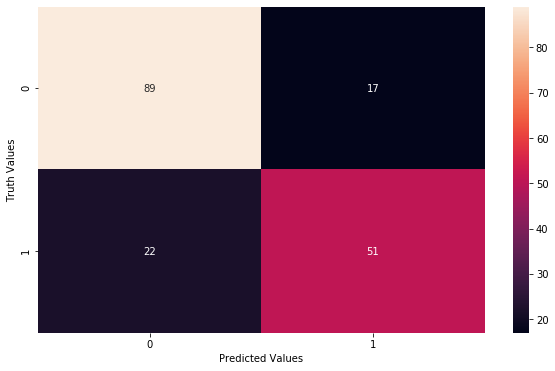

In [130]:
plt.figure(figsize=(10,6))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

# RandomForest Classifier

In [131]:
RF_classifier=RandomForestClassifier(n_estimators=100)

In [132]:
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
y_pred2= RF_classifier.predict(x_test)

In [134]:
y_pred2

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [135]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[98  8]
 [25 48]]


In [136]:
score2=accuracy_score(y_test, y_pred2) 
print('Accuracy :',score2)


Accuracy : 0.8156424581005587


Text(69.0, 0.5, 'Truth Values')

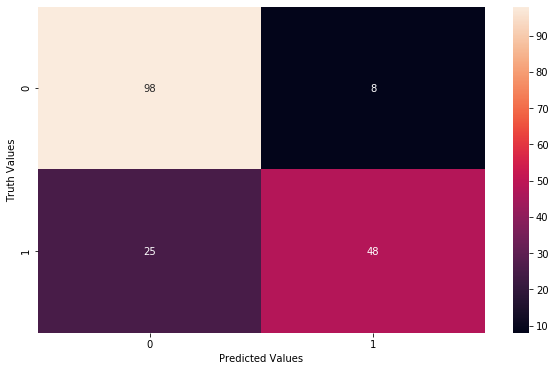

In [137]:
plt.figure(figsize=(10,6))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

# SupportVector

In [138]:
SV_classifier=SVC()

In [139]:
SV_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
y_pred3=SV_classifier.predict(x_test)

In [141]:
y_pred3

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [142]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[100   6]
 [ 34  39]]


In [143]:
score3=accuracy_score(y_test, y_pred3) 
print('Accuracy :',score3) 


Accuracy : 0.776536312849162


Text(69.0, 0.5, 'Truth Values')

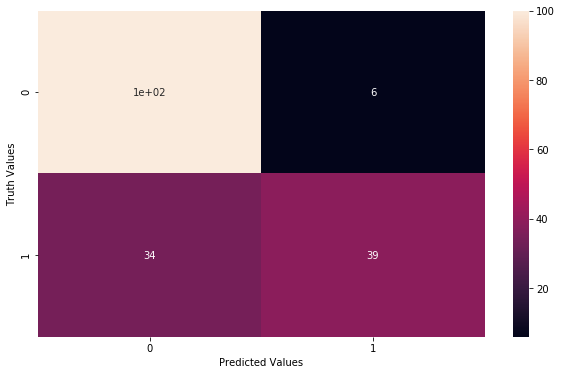

In [144]:
plt.figure(figsize=(10,6))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

# KNeighborsClassifier

In [145]:
KN_classifier=KNeighborsClassifier()

In [146]:
KN_classifier.fit(x_train, y_train)
y_pred4 = KN_classifier.predict(x_test)

In [147]:
y_pred4

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1])

In [148]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[91 15]
 [31 42]]


In [149]:
score4=accuracy_score(y_test, y_pred4) 
print('Accuracy :',score4)

Accuracy : 0.7430167597765364


Text(69.0, 0.5, 'Truth Values')

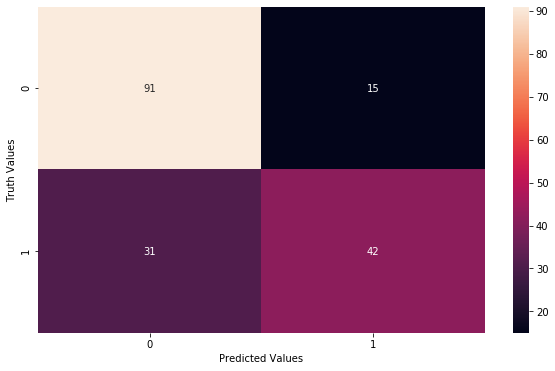

In [150]:
plt.figure(figsize=(10,6))
sn.heatmap(cm4, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

# Graphs of various columns with respect to the target column

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


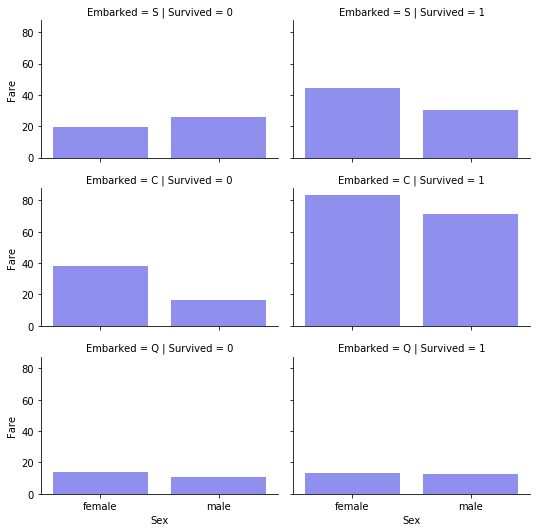

In [151]:
histo1 = sn.FacetGrid(df, row='Embarked', col='Survived', size=2.5, aspect=1.5)
histo1.map(sn.barplot, 'Sex', 'Fare', alpha=.5, ci=None,color='blue')
histo1.add_legend()
#observation-people who paid more had a better survival rate therefore survival rate of people who embarked from q are high because they paid more fare
#survival rate of female passengers are high

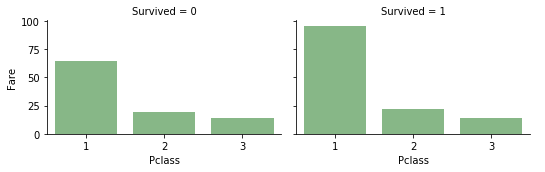

In [152]:
histo2 = sn.FacetGrid(df, col='Survived', size=2.5, aspect=1.5)
histo2.map(sn.barplot, 'Pclass', 'Fare', alpha=.5, ci=None,color='green')
histo2.add_legend()
#OBSERVATION-survival rate of pclass=1 was the highest
#pclass1 paid higher fare as compared to the other pclass confirming that people who paid more fair had a better chances of survival

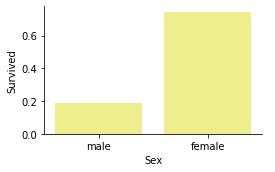

In [153]:
histo3 = sn.FacetGrid(df,size=2.5, aspect=1.5)
histo3.map(sn.barplot, 'Sex', 'Survived', alpha=.5, ci=None,color='yellow')
histo3.add_legend()
#female passengers survival rate was higher

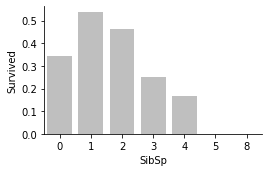

In [154]:
histo4 = sn.FacetGrid(df,size=2.5, aspect=1.5)
histo4.map(sn.barplot, 'SibSp', 'Survived', alpha=.5, ci=None,color='gray')
histo4.add_legend()
#people with a bigger family size had less survival rate

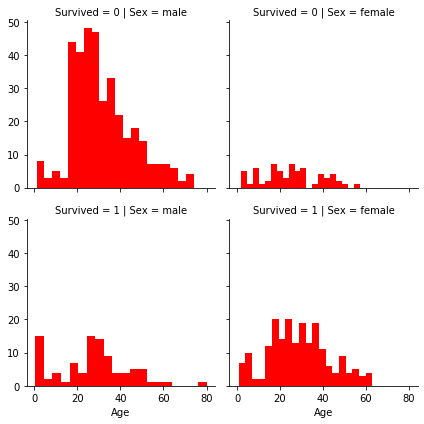

In [155]:
histo5 = sn.FacetGrid(df, row='Survived',col='Sex')
histo5.map(plt.hist, 'Age', bins=20,color='red')

In [156]:
model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC','KNN'],
    'Score': [score1,score2,score3,score4]})
model.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.815642
0,Logistic Regression,0.782123
2,SVC,0.776536
3,KNN,0.743017
